In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\User\\Desktop\\Machine Learning\\Pandas\\Datasets\\user_behavior_dataset.csv")
print("\nFirst 4 Rows of the Dataset:")
df.head(4)  


First 4 Rows of the Dataset:


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3


# Exploratory Data Analysis

In [60]:
df.columns

Index(['Device Model', 'Operating System', 'App Usage Time (min/day)',
       'Screen On Time (hours/day)', 'Battery Drain (mAh/day)',
       'Number of Apps Installed', 'Data Usage (MB/day)', 'Age', 'Gender',
       'User Behavior Class'],
      dtype='object')

In [5]:
df.shape

(700, 11)

In [7]:
df.isnull().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [13]:
df.dtypes.to_frame().reset_index().rename(columns = {'index': 'features', 0: 'data_types'})

,features,data_types
0,User ID,int64
1,Device Model,object
2,Operating System,object
3,App Usage Time (min/day),int64
4,Screen On Time (hours/day),float64
5,Battery Drain (mAh/day),int64
6,Number of Apps Installed,int64
7,Data Usage (MB/day),int64
8,Age,int64
9,Gender,object


In [17]:
#Numerical Data
df.describe().round(3)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000,700.000,700.000,700.000,700.000,700.000,700.000,700.000
mean,350.500,271.129,5.273,1525.159,50.681,929.743,38.483,2.990
std,202.217,177.199,3.069,819.136,26.943,640.452,12.013,1.401
min,1.000,30.000,1.000,302.000,10.000,102.000,18.000,1.000
25%,175.750,113.250,2.500,722.250,26.000,373.000,28.000,2.000
50%,350.500,227.500,4.900,1502.500,49.000,823.500,38.000,3.000
75%,525.250,434.250,7.400,2229.500,74.000,1341.000,49.000,4.000
max,700.000,598.000,12.000,2993.000,99.000,2497.000,59.000,5.000


In [19]:
# Categorical Data
df.describe(include="object").round(3)

,Device Model,Operating System,Gender
count,700,700,700
unique,5,2,2
top,Xiaomi Mi 11,Android,Male
freq,146,554,364


In [15]:
df.nunique()

User ID                       700
Device Model                    5
Operating System                2
App Usage Time (min/day)      387
Screen On Time (hours/day)    108
Battery Drain (mAh/day)       628
Number of Apps Installed       86
Data Usage (MB/day)           585
Age                            42
Gender                          2
User Behavior Class             5
dtype: int64

In [21]:
#Drop Unneccessary data
df.drop(["User ID"],axis=1,inplace=True)

In [58]:
df.duplicated().sum()

0

# Data  Visualization

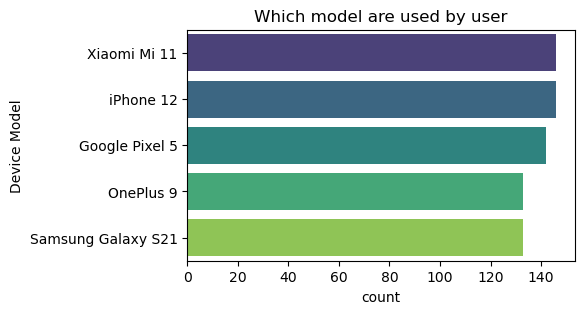

In [33]:
# Countplot for categorical features
plt.figure(figsize=(5, 3))
sns.countplot(y=df["Device Model"], order=df["Device Model"].value_counts().index, palette="viridis")
plt.title("Which model are used by user")
plt.show()

Text(0.5, 1.0, 'Index in male and female')

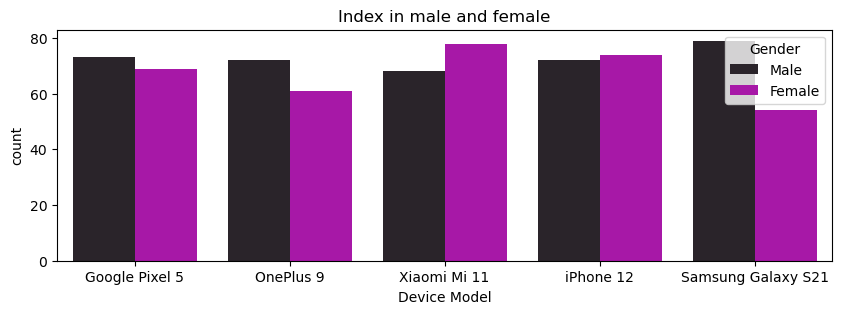

In [92]:
plt.figure(figsize=(10,3))
sns.countplot(x="Device Model" , hue="Gender" , data=df, color="m")
plt.title("Index in male and female")

Text(0.5, 1.0, 'Index in male and female')

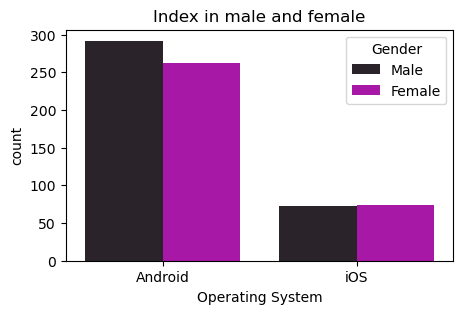

In [94]:
plt.figure(figsize=(5,3))
sns.countplot(x="Operating System" , hue="Gender" , data=df, color="m")
plt.title("Index in male and female")

In [76]:
df.value_counts("Gender")

Gender
Male      364
Female    336
Name: count, dtype: int64

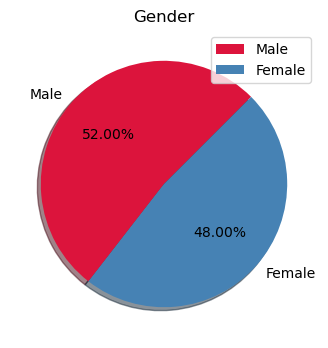

In [55]:
plt.figure(figsize = (4, 4))
plt.pie(x = df['Gender'].value_counts(),\
        labels = ['Male', 'Female'],\
        shadow = True,\
        colors = ['crimson', 'steelblue'],\
        autopct = '%0.2f%%',\
        startangle = 45)
plt.title('Gender')
plt.legend()
plt.show()

In [70]:
df.value_counts('Operating System')

Operating System
Android    554
iOS        146
Name: count, dtype: int64

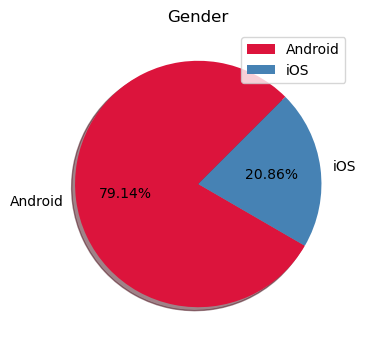

In [74]:
plt.figure(figsize = (4, 4))
plt.pie(x = df['Operating System'].value_counts(),\
        labels = ['Android','iOS'],\
        shadow = True,\
        colors = ['crimson', 'steelblue'],\
        autopct = '%0.2f%%',\
        startangle = 45)
plt.title('Gender')
plt.legend()
plt.show()

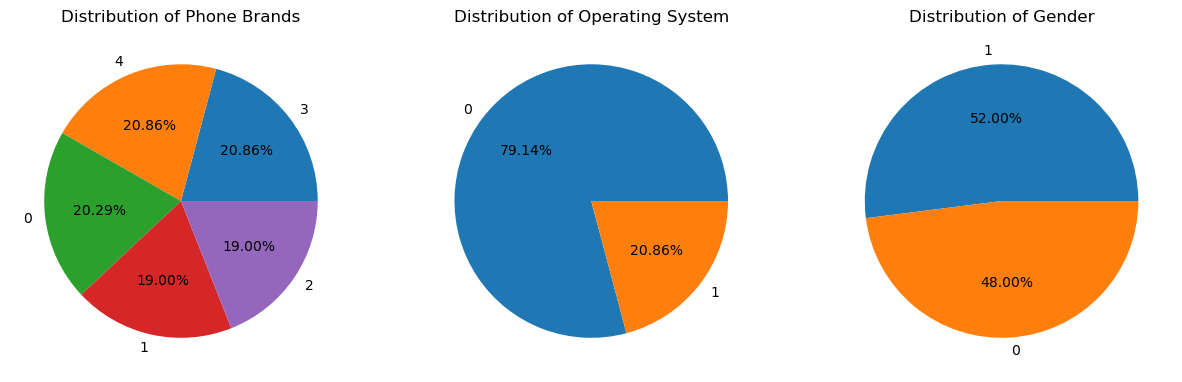

In [164]:
phonedf=df['Device Model'].value_counts().reset_index()
systemdf=df['Operating System'].value_counts().reset_index()
sexdf=df['Gender'].value_counts().reset_index()
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].pie(x=phonedf['count'],labels=phonedf['Device Model'],autopct='%.2f%%') #First subplot
ax[0].set_title("Distribution of Phone Brands")
ax[1].pie(x=systemdf['count'],labels=systemdf['Operating System'],autopct='%.2f%%') #Second subplot
ax[1].set_title("Distribution of Operating System")
ax[2].pie(x=sexdf['count'],labels=sexdf['Gender'],autopct='%.2f%%')   #Third subplot
ax[2].set_title("Distribution of Gender")
plt.show()

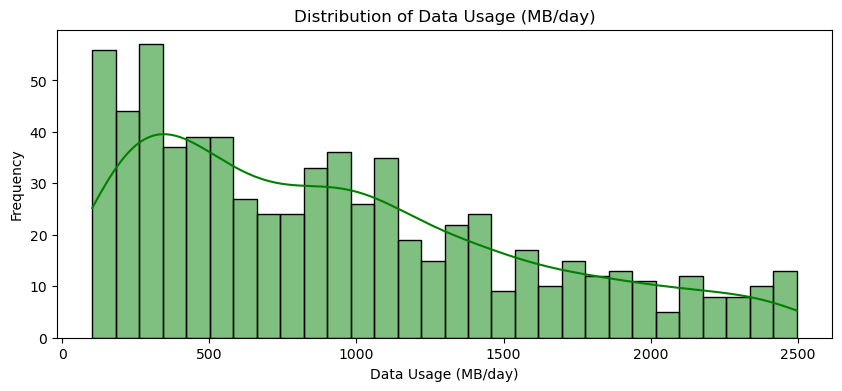

In [174]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Data Usage (MB/day)'], bins=30, color='g', kde=True)
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

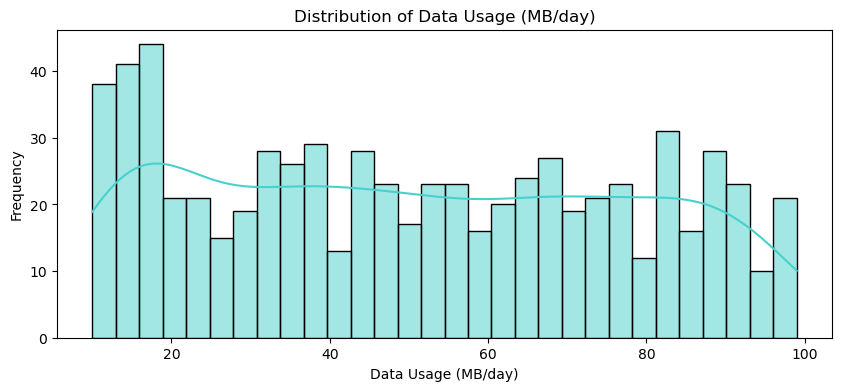

In [176]:
plt.figure(figsize=(10, 4))
sns.histplot(df['Number of Apps Installed'], bins=30, color='mediumturquoise', kde=True)
plt.title('Distribution of Data Usage (MB/day)')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

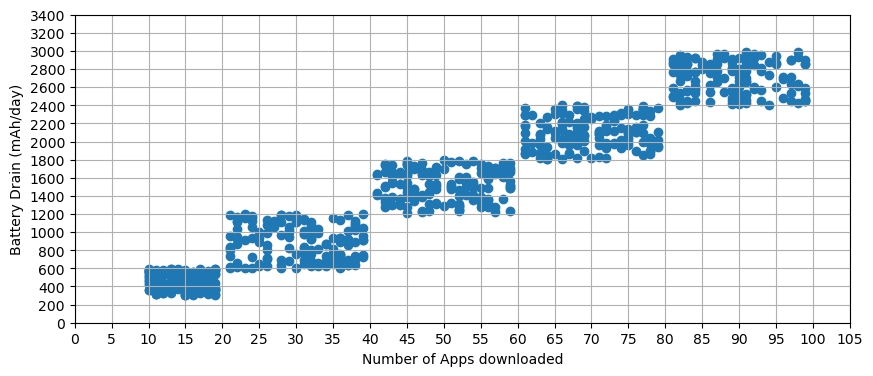

In [178]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Number of Apps Installed'],df['Battery Drain (mAh/day)'])
plt.ylabel('Battery Drain (mAh/day)')
plt.xlabel('Number of Apps downloaded')
plt.xticks(np.arange(0, 110, 5))
plt.yticks(np.arange(0, 3500, 200))
plt.grid()
plt.show()

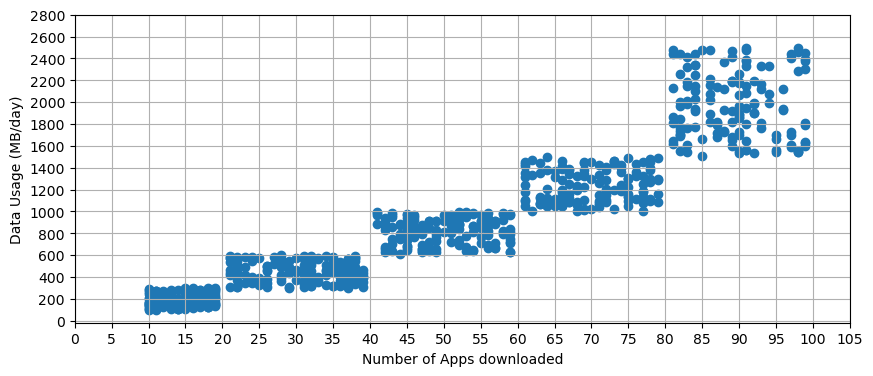

In [180]:
plt.figure(figsize=(10, 4))
plt.scatter(df['Number of Apps Installed'],df['Data Usage (MB/day)'])
plt.ylabel('Data Usage (MB/day)')
plt.xlabel('Number of Apps downloaded')
plt.xticks(np.arange(0, 110, 5))
plt.yticks(np.arange(0, 3000, 200))
plt.grid()
plt.show()

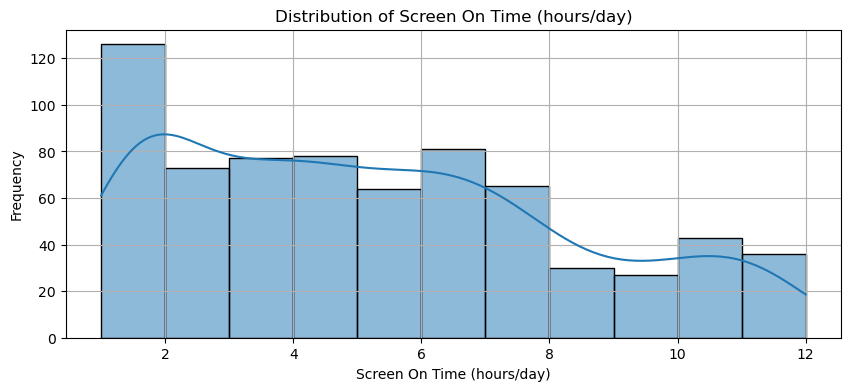

In [198]:
plt.figure(figsize=(10, 4))
sns.histplot(data=df, x='Screen On Time (hours/day)', kde=True)
plt.title('Distribution of Screen On Time (hours/day)')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

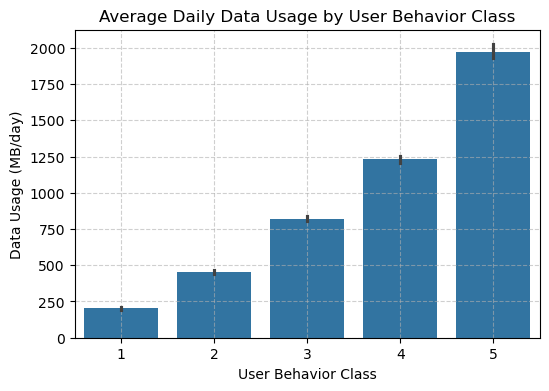

In [214]:
plt.figure(figsize=(6, 4))
sns.barplot(x='User Behavior Class', y='Data Usage (MB/day)', data=df, estimator='mean')
plt.title('Average Daily Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

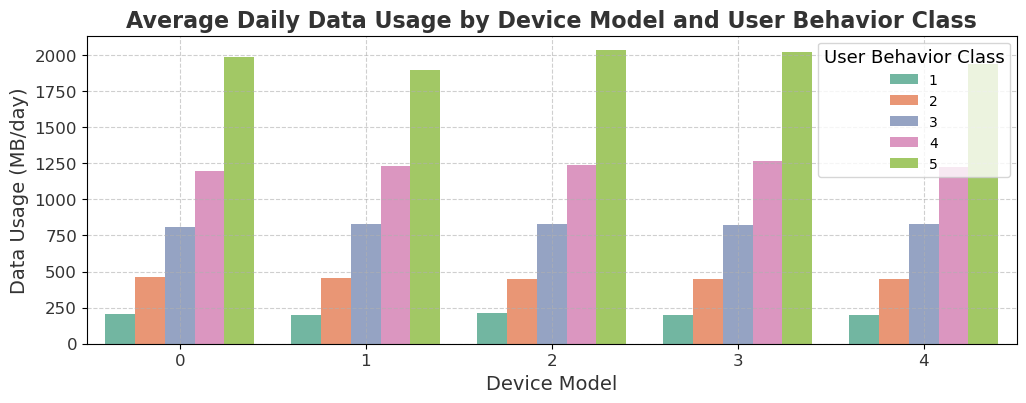

In [208]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Device Model', y='Data Usage (MB/day)', data=data_usage_class_device, hue='User Behavior Class', palette='Set2')
plt.title('Average Daily Data Usage by Device Model and User Behavior Class', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Device Model', fontsize=14, color='#333')
plt.ylabel('Data Usage (MB/day)', fontsize=14, color='#333')
plt.xticks(rotation=0, fontsize=12, color='#333')
plt.yticks(fontsize=12, color='#333')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='User Behavior Class', title_fontsize='13', loc='upper right')
plt.show()

# Data Preprocessing

In [107]:
for col in df.columns[df.dtypes=='object']:
    print(df[col].value_counts(),'\n\n')

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64 


Operating System
Android    554
iOS        146
Name: count, dtype: int64 


Gender
Male      364
Female    336
Name: count, dtype: int64 




In [125]:
from sklearn.preprocessing import LabelEncoder

In [127]:
le=LabelEncoder()    #Encoding categorical values
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

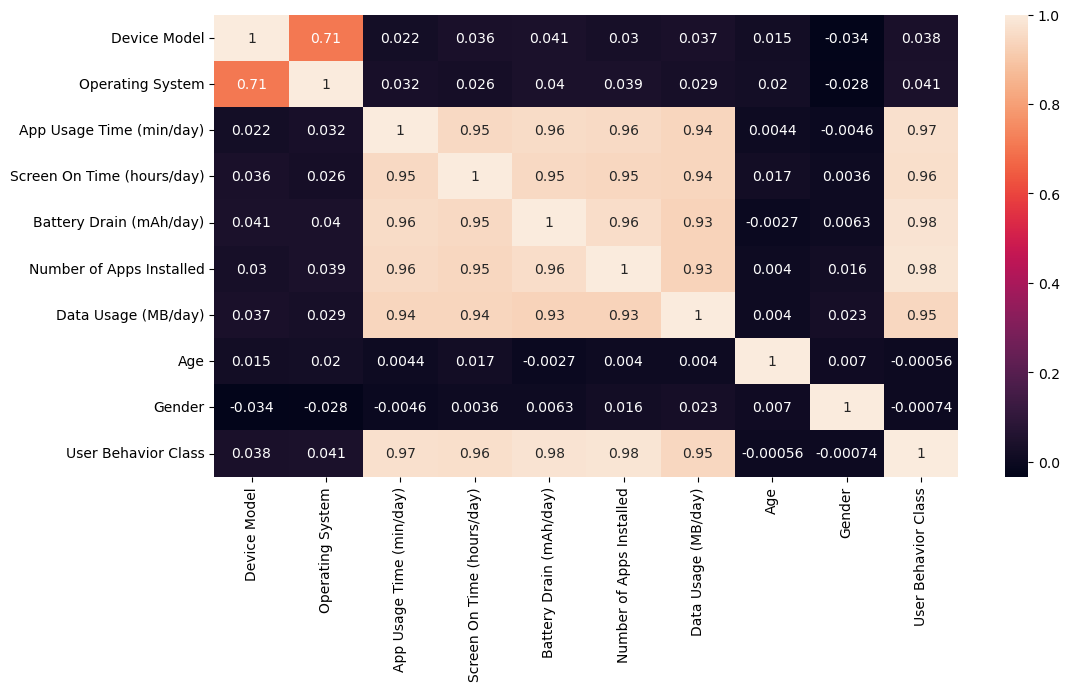

In [216]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [131]:
x=df.drop(columns=['User Behavior Class'],axis=1)
y=df['User Behavior Class']

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# LogisticRegression

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

# Predictions
y_pred = log_reg.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7095238095238096
Confusion Matrix:
 [[36 10  0  0  0]
 [ 1 26  6  1  0]
 [ 0 15 28  6  1]
 [ 0  0 13 30  4]
 [ 0  0  0  4 29]]
Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.78      0.87        46
           2       0.51      0.76      0.61        34
           3       0.60      0.56      0.58        50
           4       0.73      0.64      0.68        47
           5       0.85      0.88      0.87        33

    accuracy                           0.71       210
   macro avg       0.73      0.72      0.72       210
weighted avg       0.74      0.71      0.72       210



# SVM

In [144]:
from sklearn.svm import SVC

# Model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(x_train, y_train)

# Predictions
y_pred = svm_model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



# RandomForestClassifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(x_train, y_train)

# Predictions
y_pred = rf_model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



# KNeighborsClassifier

In [149]:
from sklearn.neighbors import KNeighborsClassifier

# Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

# Predictions
y_pred = knn_model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



# DecisionTreeClassifier

In [153]:
from sklearn.tree import DecisionTreeClassifier

# Model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

# Predictions
y_pred = dt_model.predict(x_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9952380952380953
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  1 49  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       0.97      1.00      0.99        34
           3       1.00      0.98      0.99        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       0.99      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



# RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [162]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

model_list = {
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

for name, model in model_list.items():
    model.fit(x_train, y_train)  
    y_pred = model.predict(x_test)  
    
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

Model: RandomForest
Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

Model: GradientBoosting
Accuracy: 1.0
Confusion Matrix:
 [[46  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 50  0  0]
 [ 0  0  0 47  0]
 [ 0  0  0  0 33]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
        